### Implement the entire process of creating and training a Convolutional Neural Network on the MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn

plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
import torchvision
import torchvision.transforms as T

transform = T.ToTensor() #convert to tensor

train_ds = torchvision.datasets.MNIST('./data_m', train=True, download=True, transform=transform)
test_ds = torchvision.datasets.MNIST('./data_m', train=False, download=True, transform=transform)

torch.Size([1, 28, 28]) 5
torch.Size([28, 28]) 5


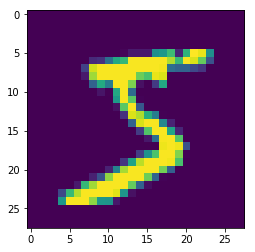

In [3]:
# classification images into 10 classes

x, y = train_ds[0]
print(x.shape, y)

x = torch.squeeze(x,0)
print(x.shape, y)

plt.imshow(x)

In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.l1 = nn.Conv2d(1, 8, 3, padding=1)
        self.l2 = nn.Conv2d(8, 16, 3, padding=1)
        self.l3 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.global_pool = nn.MaxPool2d(4, 4)
        self.output = nn.Linear(32, 10)
         
        
    def forward(self, x):
        for l in [self.l1, self.l2, self.l3]:
            x = l(x)
            x = torch.relu(x)
            x = self.pool(x)
        
        x = self.global_pool(x)
        x = x.view(x.shape[0], x.shape[1]) #remove the width and height
        x = self.output(x)
        
        return x

In [5]:
def softmax(x):
    e = x.exp()
    
    return e / e.sum(1, keepdim=True)

def cross_entropy(y, y_hat, eps=1e-7):
    return -(y * (y_hat + eps).log()).mean()

def accuracy(a, b):
    return (a == b).float().mean()

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

epoch 0, train loss 0.64, train acc 0.81, test loss 0.22, test acc 0.93


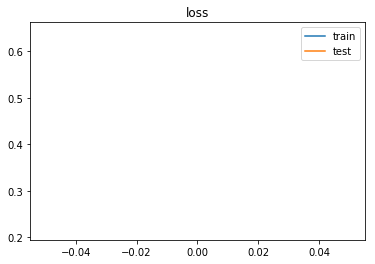

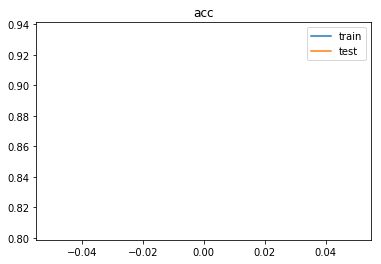

  1%|▊                                                                               | 1/100 [01:00<1:40:32, 60.94s/it]

epoch 1, train loss 0.16, train acc 0.95, test loss 0.14, test acc 0.96


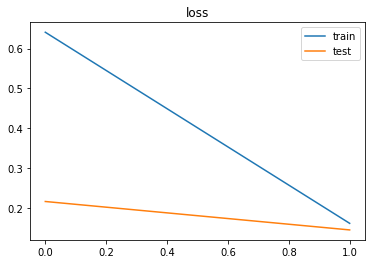

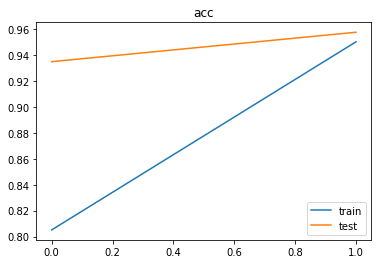

  2%|█▌                                                                              | 2/100 [02:02<1:39:37, 60.99s/it]

epoch 2, train loss 0.12, train acc 0.96, test loss 0.11, test acc 0.97


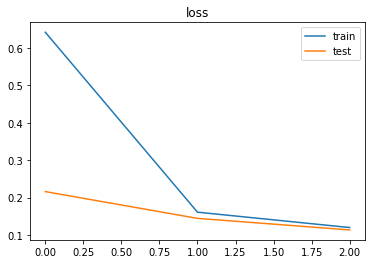

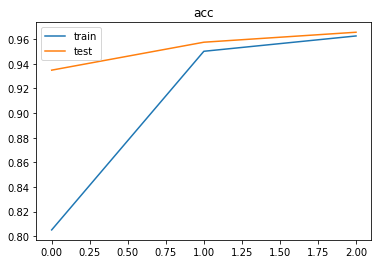

  3%|██▍                                                                             | 3/100 [03:09<1:41:37, 62.86s/it]

epoch 3, train loss 0.10, train acc 0.97, test loss 0.09, test acc 0.97


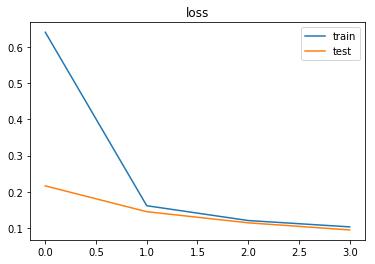

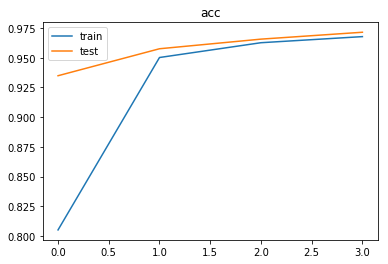

  4%|███▏                                                                            | 4/100 [04:11<1:40:26, 62.77s/it]

epoch 4, train loss 0.09, train acc 0.97, test loss 0.08, test acc 0.98


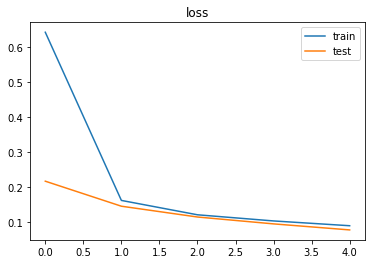

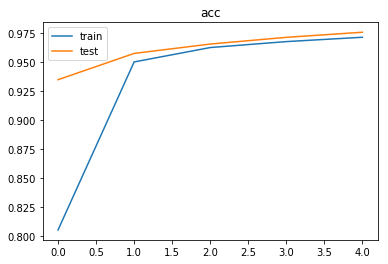

  5%|████                                                                            | 5/100 [05:14<1:39:15, 62.69s/it]

epoch 5, train loss 0.08, train acc 0.98, test loss 0.06, test acc 0.98


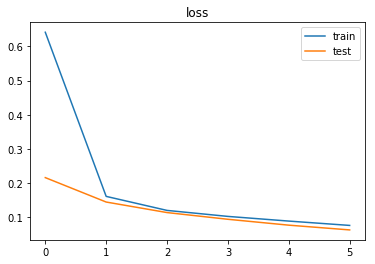

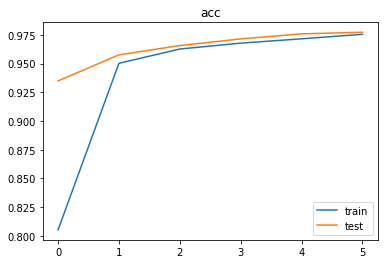

  6%|████▊                                                                           | 6/100 [06:18<1:38:50, 63.09s/it]

epoch 6, train loss 0.07, train acc 0.98, test loss 0.06, test acc 0.98


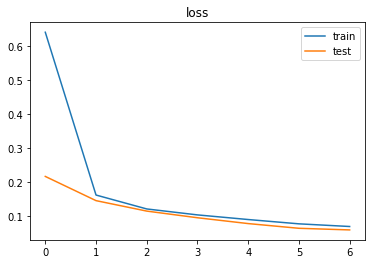

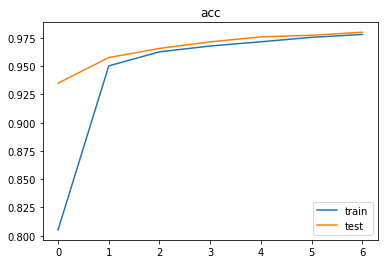

  7%|█████▌                                                                          | 7/100 [07:19<1:36:52, 62.50s/it]

KeyboardInterrupt: 

In [6]:
from tqdm import tqdm
import torch.nn.functional as F

model = Model()
opt = torch.optim.Adam(model.parameters(), 1e-3)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=100, shuffle =True, drop_last=True )   
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=100, shuffle =False, drop_last=True )

stats = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}
for epoch in tqdm(range(100)):
    train_accs = []
    train_losses = []
    test_accs = []
    test_losses = []
    
    for images, targets in train_dl:
        logits = model(images)
        
        train_loss = F.cross_entropy(input=logits, target=targets)
        train_acc = accuracy(targets, logits.argmax(1))
        
        train_losses.append(train_loss.data.numpy())
        train_accs.append(train_acc.data.numpy()) #accuracy calculation for all batches
        
        opt.zero_grad()
        train_loss.backward()
        opt.step()
        
    train_loss = np.mean(train_losses)
    train_acc = np.mean(train_accs)
        
    for images, targets in test_dl:
        logits = model(images)
        
        test_loss = F.cross_entropy(input=logits, target=targets)
        test_acc = accuracy(targets, logits.argmax(1))
        
        test_losses.append(test_loss.data.numpy())
        test_accs.append(test_acc.data.numpy()) #accuracy calculation for all batches
        
        opt.zero_grad()
        test_loss.backward()
        opt.step()
        
    test_loss = np.mean(test_losses)
    test_acc = np.mean(test_accs)
        
    print('epoch {}, train loss {:.2f}, train acc {:.2f}, test loss {:.2f}, test acc {:.2f}'.format(
        epoch, train_loss, train_acc, test_loss, test_acc))
    
    stats['train_loss'].append(train_loss)
    stats['train_acc'].append(train_acc)
    stats['test_loss'].append(test_loss)
    stats['test_acc'].append(test_acc)

    plt.plot(stats['train_loss'], label='train')
    plt.plot(stats['test_loss'], label='test')
    plt.title('loss')
    plt.legend()
    plt.show()

    plt.plot(stats['train_acc'], label='train')
    plt.plot(stats['test_acc'], label='test')
    plt.title('acc')
    plt.legend()
    plt.show()